# MODELO 2 - Avaliação do Modelo de Árvore de Classificação ( CART ).

### Introdução.
##### Este  Notebook é destina a avaliação do modelo de Árvore de Classificação

---

---

---


In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc ,accuracy_score,recall_score, precision_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#  1) Carregando os dados de treino e teste para avaliação do modelo

In [3]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [4]:
output = ".\\baseDados\\voice_treino_test.pk"

In [5]:
dic_base_treino_file = pickle.load(open( output, "rb" ))

In [6]:
y_train = dic_base_treino_file['y_train'] 
y_test = dic_base_treino_file['y_test'] 
X_train = dic_base_treino_file['X_train_norm']  
X_test = dic_base_treino_file['X_test_norm']
feature_cols =  dic_base_treino_file['feature_cols']

print(feature_cols)


Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'int'],
      dtype='object')


In [7]:
dfContador =pandas.DataFrame(list(y_train), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    1108
1    1108
dtype: int64


In [8]:
dfContador =pandas.DataFrame(list(y_test), columns = ['genero'])
contagem = dfContador.groupby('genero').size()
print(contagem)

genero
0    476
1    476
dtype: int64


---


#  2)  Declarando o modelo: Index de Gini.

O coeficiente de Gini se calcula como uma razão das áreas no diagrama da curva de Lorenz. Se a área entre a linha de perfeita igualdade e a curva de Lorenz é A, e a área abaixo da curva de Lorenz é B, então o coeficiente de Gini é igual a A/(A+B).

Esta razão se expressa como percentagem ou como equivalente numérico dessa percentagem, que é sempre um número entre 0 e 1. O coeficiente de Gini pode ser calculado com a Fórmula de Brown, que é mais prática:

$${\displaystyle G=1-\sum _{k=0}^{k=n-1}(X_{k+1}-X_{k})(Y_{k+1}+Y_{k})}{\displaystyle G=1-\sum _{k=0}^{k=n-1}(X_{k+1}-X_{k})(Y_{k+1}+Y_{k})}$$

onde:

G = coeficiente de Gini
X = proporção acumulada da variável "população"
Y = proporção acumulada da variável "renda"







In [9]:
# Create Decision Tree
classifier = DecisionTreeClassifier()

#  3) Treinamento e teste do modelo.

In [10]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
y_pred=classifier.predict(X_test)

---

# 4) Modelo de avaliação de métricas.

###  Matriz de confusão.
Uma matriz de confusão pode ser definida livremente como uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

In [12]:
cm=confusion_matrix(y_test,y_pred)


In [13]:
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]

In [14]:
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,474,2,476
Positivos,10,466,476


In [15]:
print(confusion_matrix_lda)

           Previsão dos negativos  Previsão dos positivos  Total
Negativos                     474                       2    476
Positivos                      10                     466    476


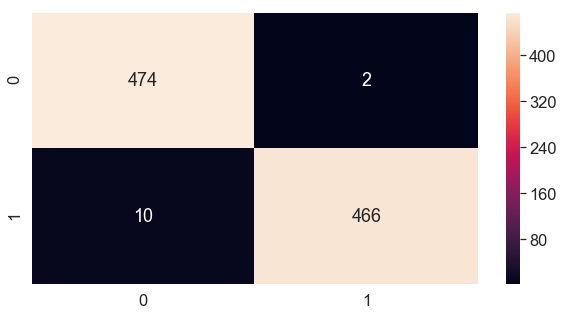

In [16]:
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

---

### True Positives:TP
Este valor indica a quantidade de registros que foram classificados como positivos corretamente.

In [17]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )

In [18]:
dfTP

,Quantidade acertos
Positivos verdadeiros,466


In [19]:
print(dfTP)

                       Quantidade acertos
Positivos verdadeiros                 466


---

### True Negatives:TN
Este valor indica a quantidade de registros que foram classificados como negativos de maneira correta.

In [20]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Negativo verdadeiro'], columns = ['Quantidade acertos'] )

In [21]:
dfTN

,Quantidade acertos
Negativo verdadeiro,474


In [22]:
print(dfTN)

                     Quantidade acertos
Negativo verdadeiro                 474


---

### Falso Positivos - False Positives:FP
Este valor indica a quantidade de registros que foram classificados como  positivos de maneira incorreta.

In [23]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )

In [24]:
dfFP

,Quantidade acertos
Falso Positivo,2


In [25]:
print(dfFP)

                Quantidade acertos
Falso Positivo                   2


---

### False Negatives:FN
Este valor indica a quantidade de registros que foram classificados como  negativos de maneira incorreta.

In [26]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Falso Negativos'], columns = ['Quantidade acertos'] )

In [27]:
dfFN

,Quantidade acertos
Falso Negativos,10


In [28]:
print(dfFN)

                 Quantidade acertos
Falso Negativos                  10


---

### Especificidade (Specificity)
Especificidade é a proporção de previsões negativas corretas para o total não de previsões negativas. Isso determina o grau de especificidade do classificador na previsão de instâncias positivas.

Specificity = (Numero de previsões negativas correta) / (Total do Numero Negativas prevista)

TN = / TN + FP

In [29]:
Specificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(Specificity, index = ['Specificity'], columns = ['resultado'] )

In [30]:
dfSpecificity

,resultado
Specificity,0.995798


In [31]:
print(dfSpecificity)

             resultado
Specificity   0.995798


---

### Precisão Geral (Accuracy)
A precisão da classificação é a proporção de previsões corretas para o total não  de previsões. 

Accuracy = (numero de predições corretas / numero de predições)

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [32]:
#trés maneiras de fazer o caluclo
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))
print("Accuracy ", classifier.score(X_test, y_test)*100)
Accuracy= classifier.score(X_test, y_test)

0.9873949579831933
0.9873949579831933
Accuracy  98.73949579831933


In [33]:
dfAccuracy = pandas.DataFrame(Accuracy, index = ['Accuracy'], columns = ['resultado'] )
dfAccuracy

,resultado
Accuracy,0.987395


In [34]:
print(dfAccuracy)

          resultado
Accuracy   0.987395


---

### Sensibilidade ou recordação Recall




Sensibilidade ou recordação é a razão de previsões positivas corretas para o total não de previsões positivas, ou, mais simplesmente, quão sensível o classificador é para detectar instâncias positivas. Isso também é chamado de True Positive Rate

Recall = (Numero de positivas previstas corretamente) /( total de Predições positivas)

$$Recall = \frac{TP}{TP +FN}$$


In [35]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))
Recall= recall_score(y_test, y_pred)

0.9789915966386554
0.9789915966386554


In [36]:
dfRecall = pandas.DataFrame(Recall, index = ['Sensibilidade-Recall'], columns = ['resultado'] )
dfRecall

,resultado
Sensibilidade-Recall,0.978992


In [37]:
print(dfRecall)

                      resultado
Sensibilidade-Recall   0.978992


---

## Taxa positiva falsa (False Positive Rate)
A *false positive rate*, é a proporção de previsões negativas que foram determinadas como positivas para o número total de previsões negativas ou quando o valor real é negativo, com que frequência a previsão é incorreta.

FalsePositveRate = Números de falsos positivos / Total de predições negativas


$$FalsePositveRate = \frac{FP}{ TN + FP}$$


In [38]:
print(FP / float(TN + FP))
FalsePositveRate = FP / float(TN + FP)

0.004201680672268907


In [39]:
dfFalsePositveRate = pandas.DataFrame(FalsePositveRate, index = ['Taxa de Falso Positvo'], columns = ['resultado'] )
dfFalsePositveRate

,resultado
Taxa de Falso Positvo,0.004202


In [40]:
print(dfFalsePositveRate)

                       resultado
Taxa de Falso Positvo   0.004202


---
### Precisão (Precision)
A precisão é a proporção de previsões corretas para o total  de não previsões preditas corretas. Isso mede a precisão do classificador ao prever instâncias positivas.

Precision = Número de positivas verdadeiras / Numero total de predicados positivos

$$Precision = \frac{TP} {TP + FP}$$

In [41]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))
Precision = precision_score(y_test, y_pred)

0.9957264957264957
0.9957264957264957


In [42]:
dfPrecision = pandas.DataFrame(Precision, index = ['Precisão'], columns = ['resultado'] )
dfPrecision

,resultado
Precisão,0.995726


In [43]:
print(dfPrecision)

          resultado
Precisão   0.995726


---

### F1 Score
O F1 Score é uma média harmônica entre precisão (que, apesar de ter o mesmo nome, não é a mesma citada acima) e recall. Veja abaixo as definições destes dois termos.

Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Em geral, quanto maior o F1 score, melhor.



$$F1Score = \frac{2 \times Precisão \times Recall }{Precisão + Recall}$$


In [44]:
F1Score = 2 * Precision *  Recall /  Precision + Recall

In [45]:
print(F1Score)


2.936974789915966


In [46]:
dfF1Score = pandas.DataFrame(F1Score, index = ['F1 Score'], columns = ['resultado'] )
dfF1Score

,resultado
F1 Score,2.936975


In [47]:
print(dfF1Score)

          resultado
F1 Score   2.936975


---
###  Curva ROC
Uma curva ROC é uma forma comumente usada para visualizar o desempenho de um classificador binário, significando um classificador com duas classes de saída possíveis. A curva plota a Taxa Positiva Real (Recall) contra a Taxa Falsa Positiva (também interpretada como Especificidade 1).

In [48]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC:Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Calcula a propabildade de previsão.

In [49]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

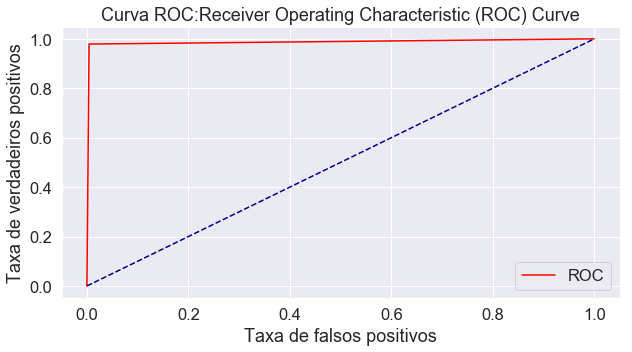

In [51]:
plot_roc_curve(fpr, tpr)

---

###  AUC (área sob a curva) da Curva ROC
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [52]:
print(roc_auc_score(y_test, y_pred_prob))
Auc=roc_auc_score(y_test, y_pred_prob)

0.9873949579831933


In [53]:
dfAuc = pandas.DataFrame(Auc, index = ['AUC'], columns = ['resultado'] )
dfAuc

,resultado
AUC,0.987395


In [54]:
print(dfAuc)

     resultado
AUC   0.987395


# 6) Arvóre do modelo

c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


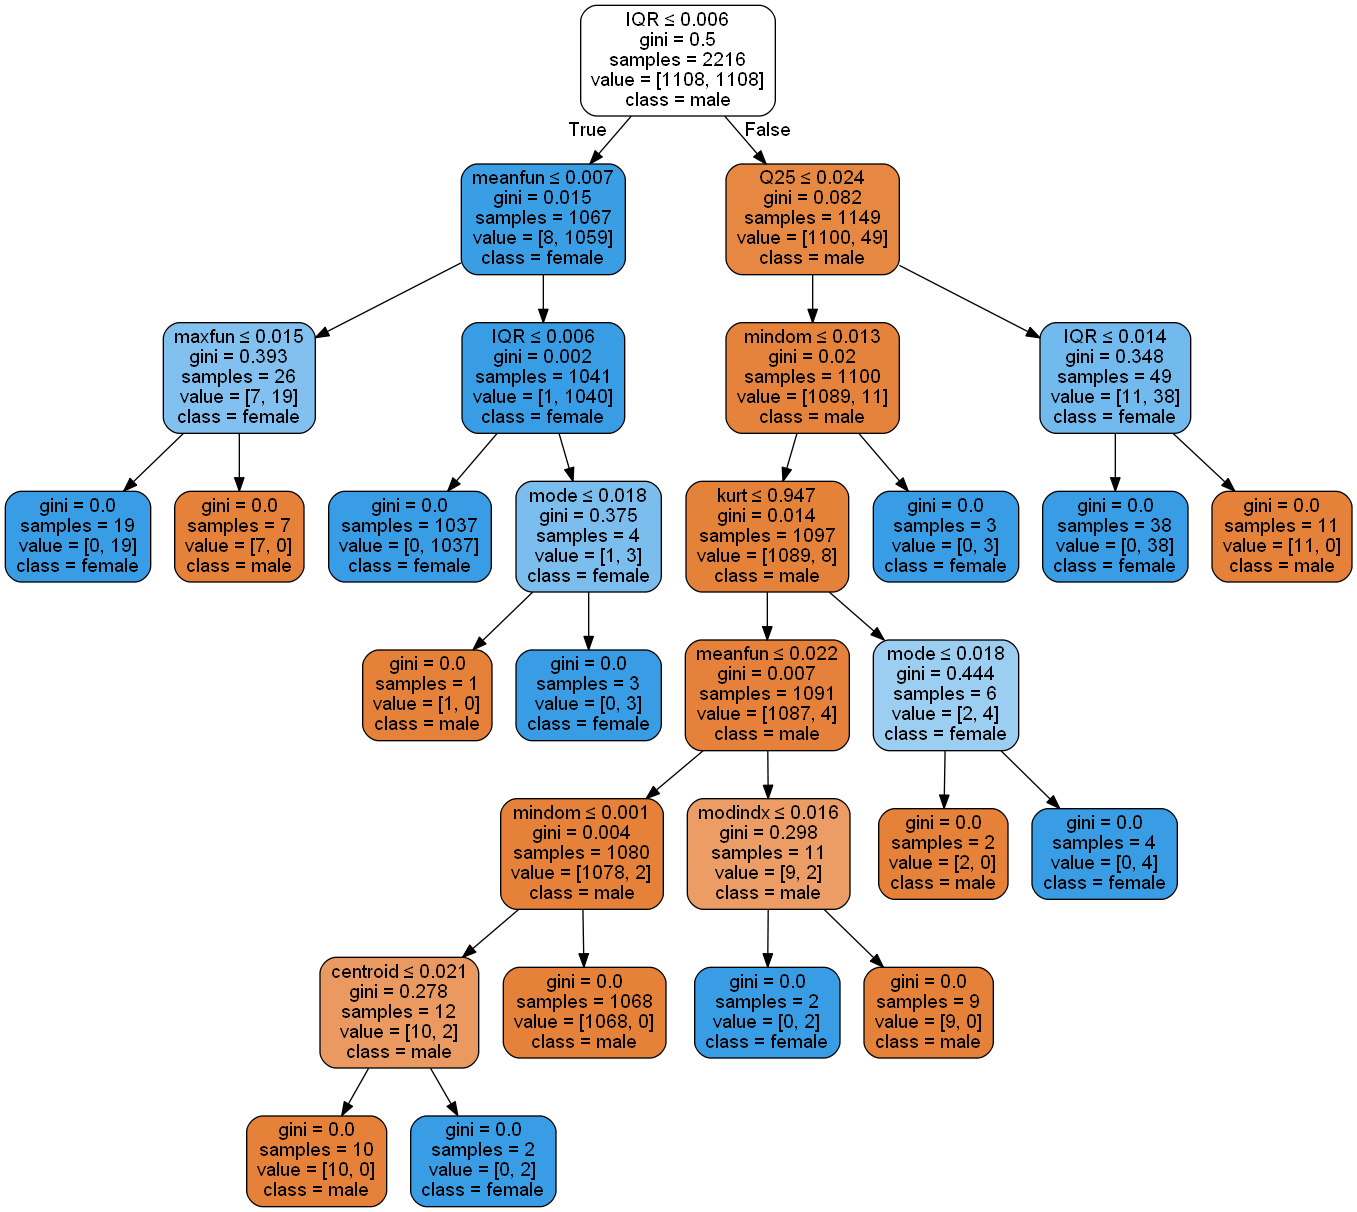

In [55]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['male','female'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vozes.png')
Image(graph.create_png())

# 7 Salvando dados para usar no gráfico comparativo.

In [56]:
dic_logist={}

In [57]:
dic_logist['Accuracy']=Accuracy
dic_logist['Auc']=Auc
dic_logist['y_pred_prob']=y_pred_prob
dic_logist['y_test']=y_test

In [58]:
import pickle

In [59]:
filename = '.\\baseDados\\cart.jss'
outfile = open(filename,'wb')
pickle.dump(dic_logist,outfile)
outfile.close()

In [60]:
infile = open(filename,'rb')
test_dict = pickle.load(infile)
infile.close()

In [61]:
print(test_dict)

{'Accuracy': 0.9873949579831933, 'Auc': 0.9873949579831933, 'y_pred_prob': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [62]:
print(type(test_dict))

<class 'dict'>


# Fim da avaliação do modelo.